## Mapping Accuracy benchmark
<br>
<b>Description</b> : In this notebook we plot the mapping accuracy comparison with publicly available tools (Figure 2D), based on the result generated from .ipynb <br>
<b>Author</b> : Hejin Huang (huang.hejin@gene.com)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# --- Data Loading and Initial Setup ---
# Base path for mapping results
mapping_results_base_path = '../../data/analysis/mapping_benchmark/'

In [3]:
# List of patient groups to process
patient_group = ['P2', 'P4', 'P5', 'P6', 'P9', 'P10']

In [4]:
# List to store results for concatenation
all_results_for_concat = []

results_200_spot = []
for i in range(len(patient_group)):
    patient = patient_group[i]
    # Hardcoded path from original notebook's cell 8
    df_patient_result = pd.read_csv(mapping_results_base_path + '200_spot/' + patient + '_result.csv', index_col=0)
    results_200_spot.append(df_patient_result)

# Concatenate results for 200 spots
# This result_df is used for the first plot.
result_df = pd.concat(results_200_spot)
result_df['feature'] = result_df.index.copy() # Add 'feature' column from index

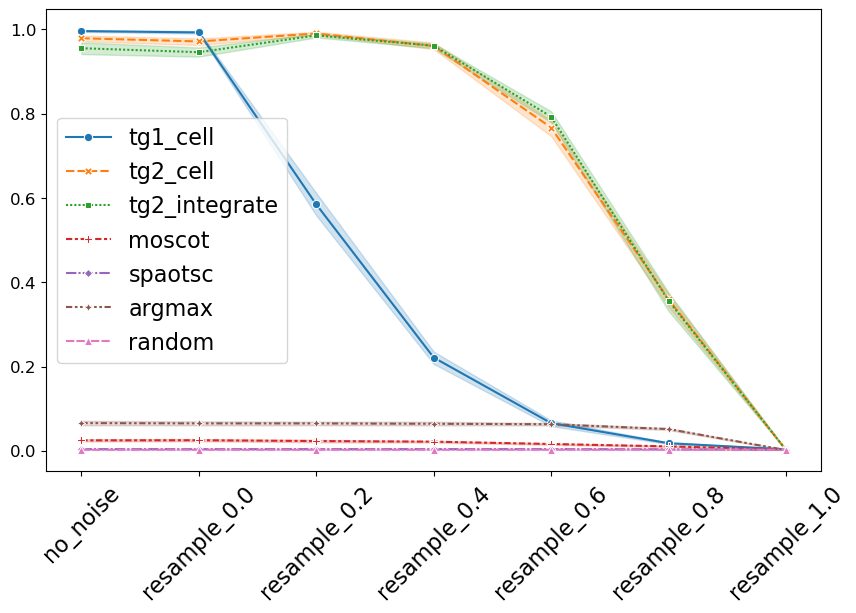

In [5]:
# --- Plotting for 200_spot results (First Plot) ---
plt.figure(figsize=(10,6))
sns.lineplot(result_df, markers=True)
plt.xticks(rotation = 45, fontsize = '16') # Rotate x-axis labels and set font size
plt.yticks(fontsize = '12') # Set y-axis font size (was commented out)
plt.legend(fontsize="16") # Add legend (was commented out)
# plt.savefig('mapping.png', dpi = 300,  bbox_inches='tight') # Saving plot (was commented out)
plt.show() # Display the plot

In [14]:
patient_group = ['P2', 'P4', 'P6', 'P9', ]# 'P5', 'P10',
num_spots = [100, 200, 300, 500,]
method = ['tg2_cell']# ['tg1_cell', 'tg2_cell']

In [15]:
result_spot = pd.DataFrame()
for num in num_spots:
    #result_spot[str(num) + '_spots'] = np.nan
    result = []
    corrected_group = patient_group.copy()
    # if num >200:
    #     corrected_group.remove('P5')
    # if num >300:
    #     corrected_group.remove('P10')
    if num >1000:
        corrected_group = ['all']
        
    for i in range(len(corrected_group)):
        patient = corrected_group[i]
        temp = pd.read_csv('../../data/analysis/mapping_benchmark/' + str(num) + '_spot/' 
                               + patient + '_result.csv', index_col = 0)

        temp['feature'] = temp.index.copy()
        #temp.index=patient + '_' + temp.index

        result.append(temp)
    result_df = pd.concat(result)
    # result_df['feature'] = result_df.index
    if num == 100:
        result_spot.index = result_df.index
    result_spot[str(num) + '_spots'] = result_df[method]
#    result_spot['feature'] = result_df['feature']
    

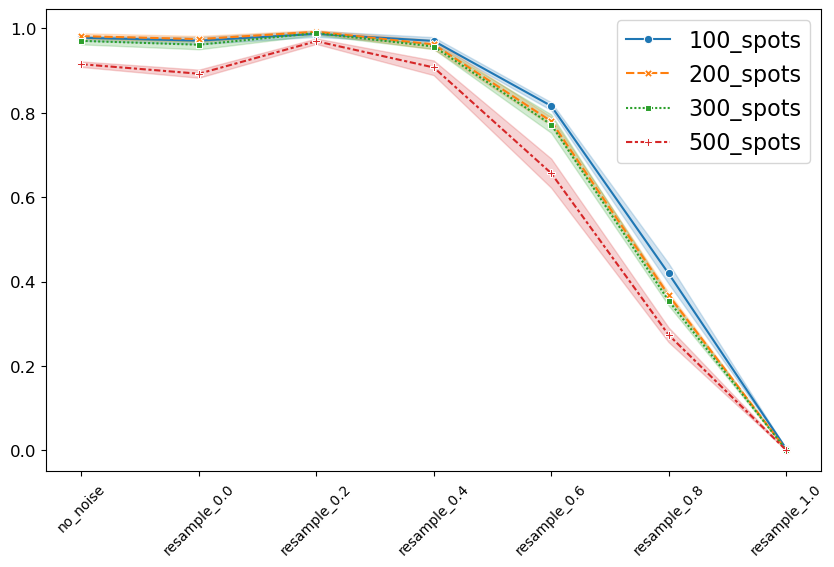

In [8]:
# --- Define parameters for spot-based analysis ---
num_spots_list = [100, 200, 300, 500]
method_name = ['tg2_cell'] # Original had commented out 'tg1_cell'

# DataFrame to store results across different numbers of spots
result_spot_df = pd.DataFrame()

# --- Loop through different numbers of spots ---
for num in num_spots_list:
    current_group_for_num = ['P2', 'P4', 'P6', 'P9']
        
    current_num_spot_results = []
    for i in range(len(current_group_for_num)):
        patient = current_group_for_num[i]
        # Construct path using num and patient
        temp_df = pd.read_csv(mapping_results_base_path + str(num) + '_spot/' + patient + '_result.csv', index_col=0)
        
        temp_df['feature'] = temp_df.index.copy() # Ensure 'feature' column is present
        # Original commented out: temp_df.index=patient + '_' + temp_df.index
        
        current_num_spot_results.append(temp_df)
    
    # Concatenate results for the current 'num'
    # This result_df_current_num is used to populate result_spot_df.
    result_df_current_num = pd.concat(current_num_spot_results)
    
    # Initialize index of result_spot_df only once with the first set of results
    if num == num_spots_list[0]: # Use the first 'num' in the list
        result_spot_df.index = result_df_current_num.index
    
    # Assign the method column(s) to the new column in result_spot_df
    # The original notebook used result_df[method] which implies 'method' is a list of columns
    result_spot_df[str(num) + '_spots'] = result_df_current_num[method_name]

# --- Plotting for Spot-based results (Second Plot) ---
plt.figure(figsize=(10,6))
sns.lineplot(result_spot_df, markers=True)
plt.xticks(rotation = 45) # Rotate x-axis labels
# The following lines were commented out in the original notebook's cell 16,
# but are now uncommented for consistency with the first plot's style.
plt.yticks(fontsize = '12') # Set y-axis font size
plt.legend(fontsize="16") # Add legend
plt.show() # Display the plot